# pandas 总结

In [2]:
import numpy as np
import pandas as pd
import copy
import time
import matplotlib.pyplot as plt
from pylab import *

## 一、pandas 的创建

### 1、通过二维数组或列表创建 

In [2]:
#创建空DataFrame
df=pd.DataFrame()
df1=pd.DataFrame(np.random.randint(1,9,(3,4)))
# df1.index=list('abc')
# df1.columns=list('abcd')
# df1
df2=pd.DataFrame([[1,2,3,4],[2,3,4,55]],index=[1,2],columns=list('abcd'))
df2

,a,b,c,d
1,1,2,3,4
2,2,3,4,55


### 2、通过字典创建 

In [3]:
dic={'shuxue':[100,90,80,70],'yuwen':[45,67,89,99]}
df3=pd.DataFrame(dic,index=['li','su','zhao','wang'])
df3

,shuxue,yuwen
li,100,45
su,90,67
zhao,80,89
wang,70,99


## 二、pandas属性 

In [4]:
df1.index
list(df1.index)

[0, 1, 2]

In [5]:
df1.columns

RangeIndex(start=0, stop=4, step=1)

In [6]:
df1.values

array([[8, 6, 2, 1],
       [5, 6, 4, 5],
       [8, 7, 3, 3]])

### 重置index为默认形式 

In [7]:
df3.reset_index(drop=True)
df3.index=list('abcd')
df3

,shuxue,yuwen
a,100,45
b,90,67
c,80,89
d,70,99


## 三、列操作

In [13]:
#获取列
df3['shuxue']

a    100
b     90
c     80
d     70
Name: shuxue, dtype: int64

In [168]:
#获取列
#获取一列返回的是series,多列时返回的是dataframe
#df3['shuxue']
df3.loc[:,'shuxue']
df3.loc[:,['shuxue','yuwen']]
#df3.iloc[:,0]

,shuxue,yuwen
a,100,45
b,90,67
c,80,89
d,70,99


In [169]:
#通过columns属性读取列
df3[df3.columns[1:]]

,yuwen
a,45
b,67
c,89
d,99


In [170]:
# #删除列,会修改原表
# df4=copy.deepcopy(df3)
# del(df4['shuxue'])
# df4

## 四、行操作

In [14]:
#获取行
#获取一行时返回的是series，多行时返回的是dataframe
#df3.ix['a']
df3.ix[['a','b']]
df3.ix['a':'c']
#df3.iloc[0]
#df3.loc['a']

,shuxue,yuwen
a,100,45
b,90,67
c,80,89


In [18]:
#通过index属性读取行
df3.loc[df3.index[1:]]
df3

,shuxue,yuwen
a,100,45
b,90,67
c,80,89
d,70,99


In [25]:
# 删除行，不修改原表
df3.drop(['a'])
df3.ix['r']=[6,7]
df3
df3.loc['r']
#df3

shuxue    6
yuwen     7
Name: r, dtype: int64

In [174]:
#添加行，append
new_data=pd.DataFrame({'shuxue':[80,40],'yuwen':[67,77]},index=['e','f'])
df3.append(new_data)

,shuxue,yuwen
a,100,45
b,90,67
c,80,89
d,70,99
e,80,67
f,40,77


## 五、基本功能 

### 1、数据文件的读取&保存 

In [48]:
#read_csv
df6=pd.read_csv('ca_list_copy.csv',header=None,names=list('abcdefgh'),index_col=None)
df6.to_csv('test.csv',header=True,index=None,columns=['a','b'],index_label=['a'])
df6.head(10)
#df6.tail(3)

,a,b,c,d,e,f,g,h
Id,zwmc,gsmc,dd,gsxz,gsgm,zwyx,xl,jy
1,数据分析师,山东半亩花田生物科技有限公司,济南,民营,100-499人,4500,大专,1-3年
2,数据分析师,智联招聘,天津,上市公司,1000-9999人,0,本科,无经验
3,数据分析师,捷信中国,天津,外商独资,10000人以上,0,本科,1-3年
4,中/高级数据分析师,宽拓(北京)科技有限公司,北京,民营,20-99人,17500.5,本科,3-5年
5,6k聘金融数据分析师/助理/交易分析师（五险双休,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.5,本科,无经验
6,证券分析师、助理、数据分析,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.5,本科,无经验
7,--集团公司登入世界第一屏纳斯达克-万向联合聘金融数据分析师,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,12500.5,大专,无经验
8,数据分析师,北京创先策略信息咨询有限公司,北京,民营,20人以下,5000.5,本科,无经验
9,BI分析师助理/数据分析师助理税后月薪5500，包吃，房补,佛山市好金企业管理信息咨询有限公司,广州,民营,20-99人,5000.5,大专,无经验


In [177]:
#to_csv
df6.to_csv('df6.csv',header=None,index=None)

### 2、缺省值/异常值处理 

In [178]:
#基本操作
#返回bool型的dataframe
df6.isnull()
#删除只要包含nan的行
df6.dropna()
#删除正行全为nan的行
df6.dropna(how='all')
#删除nan的列
df6.dropna(axis=1)
df6.dropna(how='all',axis=1).head(3)

,a,b,c,d,e,f,g,h
1,数据分析师,山东半亩花田生物科技有限公司,济南,民营,100-499人,4500.0,大专,1-3年
2,数据分析师,智联招聘,天津,上市公司,1000-9999人,0.0,本科,无经验
3,数据分析师,捷信中国,天津,外商独资,10000人以上,0.0,本科,1-3年


#### 缺失值/ 异常值替换填充

In [54]:
#fillna
#将所有缺省值填充为一个值
df6.fillna(0).head(2)
#按指定维度填充前一个值
df6.fillna(method='ffill',axis=1)
df6.fillna?
#按指定维度填充后一个值
df6.fillna(method='bfill',axis=0).head(2)
#将指定列的缺失值填充某个值
#将第一列的缺省值填充为100，第2列的缺省值填充为10
df6.fillna({1:100,2:10}).head(2)
#替换,不改变原表
df6.replace({np.nan:'aaa',0.0:10}).head(2)
df6.head(10)

,a,b,c,d,e,f,g,h
Id,zwmc,gsmc,dd,gsxz,gsgm,zwyx,xl,jy
1,数据分析师,山东半亩花田生物科技有限公司,济南,民营,100-499人,4500,大专,1-3年
2,数据分析师,智联招聘,天津,上市公司,1000-9999人,0,本科,无经验
3,数据分析师,捷信中国,天津,外商独资,10000人以上,0,本科,1-3年
4,中/高级数据分析师,宽拓(北京)科技有限公司,北京,民营,20-99人,17500.5,本科,3-5年
5,6k聘金融数据分析师/助理/交易分析师（五险双休,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.5,本科,无经验
6,证券分析师、助理、数据分析,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.5,本科,无经验
7,--集团公司登入世界第一屏纳斯达克-万向联合聘金融数据分析师,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,12500.5,大专,无经验
8,数据分析师,北京创先策略信息咨询有限公司,北京,民营,20人以下,5000.5,本科,无经验
9,BI分析师助理/数据分析师助理税后月薪5500，包吃，房补,佛山市好金企业管理信息咨询有限公司,广州,民营,20-99人,5000.5,大专,无经验


###  3、常用的统计方法

In [69]:
#按列统计非nan的记录数
df6.count().head(3)
tt=df6['a'].value_counts()
type(tt)
type(df6.count())
df6.describe()
#df6['a'].count()

,a,b,c,d,e,f,g,h
count,3385,3385,3385,3385,3385,3385,3385,3385
unique,1801,604,98,9,8,53,8,7
top,数据分析师,北京万向通汇投资有限公司,北京,股份制企业,100-499人,7000.5,大专,无经验
freq,216,862,2214,2025,1530,1176,1897,2695


In [181]:
#返回包含值以及该值的条数的series
df6['a'].value_counts().head(2)

数据分析师                           216
高薪加五险 诚聘金融数据分析师/分析助理/操盘手/交易员     24
Name: a, dtype: int64

In [182]:
#按列提供常用的统计
df6['f'].describe()

count     3384.000000
mean      8152.994976
std       3514.023568
min          0.000000
25%       7000.500000
50%       7000.500000
75%       9000.500000
max      40000.500000
Name: f, dtype: float64

In [183]:
#min/max
df6['f'].min()

0.0

In [184]:
#最大、最小值的索引idxmin()、idxmax()
df6['f'].idxmin()

2

In [185]:
#样本的分位数，（0-1），默认0.5
df6['f'].quantile(0.75)

9000.5

In [186]:
#求和，默认axis=0,按列求和
df6['f'].sum()
df6.sum(axis=1).head(2)

1    4500.0
2       0.0
dtype: float64

In [187]:
#均值mean
df6['f'].mean()

8152.994976359338

In [188]:
#median样本的中位数
#mad，平均绝对误差
#var,方差
#std,标准差
#cumsum/cumprod,累计和,累计积
#cummin/cummax,累计最小/最大
#pct_change,样本的百分数变化
df6['f'].pct_change().head(2)

1    NaN
2   -1.0
Name: f, dtype: float64

In [189]:
#协方差、相关系数
df3['shuxue'].cov(df3['yuwen'])
df3['shuxue'].corr(df3['yuwen'])

-0.98747921870451127

In [190]:
#unique,去重后的记录
df6['f'].unique()

array([  4500. ,      0. ,  17500.5,   9000.5,  12500.5,   5000.5,
         7000. ,   7000.5,  25000.5,   9000. ,   4000. ,   8000. ,
         5250. ,  18000. ,   5000. ,   4250. ,   3000.5,   4750. ,
         3500. ,  22500. ,  15000. ,  10500. ,  12500. ,  11500. ,
        40000.5,  13500. ,  14000. ,   5750. ,   6250. ,   6500. ,
         6000. ,  17500. ,  10000. ,  21500. ,   3250. ,  20000.5,
         7500. ,   5500. ,   8500. ,  20000. ,   9500. ,  26500. ,
         6999.5,   3900. ,   3750. ,   2650. ,   8250. ,  17000. ,
        16500. ,   2750. ,  16000. ,  12000. ])

In [191]:
#isin,判断样本值的范围
df3.isin([60,100])

,shuxue,yuwen
a,True,False
b,False,False
c,False,False
d,False,False


In [192]:
#排序
#sort_index
df3.sort_index(ascending=False)
#sort_values
df3['shuxue'].sort_values(ascending=True)

d     70
c     80
b     90
a    100
Name: shuxue, dtype: int64

### 4、Series层次索引 

In [193]:
data=pd.Series([100,200,122,150,180],index=[['2016','2016','2016','2017','2017'],['苹果','香蕉','西瓜','苹果','西瓜']])

In [194]:
data

2016  苹果    100
      香蕉    200
      西瓜    122
2017  苹果    150
      西瓜    180
dtype: int64

In [195]:
data['2016']

苹果    100
香蕉    200
西瓜    122
dtype: int64

In [196]:
#错的，data['苹果']

In [197]:
data['2016','苹果']

100

In [198]:
data[:,'苹果']

2016    100
2017    150
dtype: int64

#### 交换分层索引 

In [199]:
data=data.swaplevel().sort_index()

In [200]:
data

苹果  2016    100
    2017    150
西瓜  2016    122
    2017    180
香蕉  2016    200
dtype: int64

#### 转变层次索引为DataFrame的列索引 

In [201]:
#unstack(level=0 or 1)
data1=data.unstack(level=1)
#data

In [202]:
data1.stack()

苹果  2016    100.0
    2017    150.0
西瓜  2016    122.0
    2017    180.0
香蕉  2016    200.0
dtype: float64

### 5、DataFrame 的层次索引 

In [203]:
data2=pd.DataFrame({'fruit':['apple','apple','apple','bananan','bananan','bananan','pear','pear','pear'],'year':['2011','2012','2013','2011','2012','2013','2011','2012','2013'],\
                   'production':[100,200,300,200,300,100,200,300,100],'profits':[12,12,13,23,12,21,23,34,21]})

In [204]:
data2

,fruit,production,profits,year
0,apple,100,12,2011
1,apple,200,12,2012
2,apple,300,13,2013
3,bananan,200,23,2011
4,bananan,300,12,2012
5,bananan,100,21,2013
6,pear,200,23,2011
7,pear,300,34,2012
8,pear,100,21,2013


In [205]:
data2=data2.set_index(['fruit','year'])
data2

production  profits
fruit   year                     
apple   2011         100       12
        2012         200       12
        2013         300       13
bananan 2011         200       23
        2012         300       12
        2013         100       21
pear    2011         200       23
        2012         300       34
        2013         100       21

In [206]:
#data2['apple]报错，需要data2.loc['apple]
data2['production']['apple']

year
2011    100
2012    200
2013    300
Name: production, dtype: int64

In [207]:
data2.swaplevel().sort_index()

production  profits
year fruit                       
2011 apple           100       12
     bananan         200       23
     pear            200       23
2012 apple           200       12
     bananan         300       12
     pear            300       34
2013 apple           300       13
     bananan         100       21
     pear            100       21

In [208]:
data2.unstack(level='fruit')
data2.unstack(level=0)

production              profits             
fruit      apple bananan pear   apple bananan pear
year                                              
2011         100     200  200      12      23   23
2012         200     300  300      12      12   34
2013         300     100  100      13      21   21

####  按照层次索引进行统计 

In [209]:
data2

production  profits
fruit   year                     
apple   2011         100       12
        2012         200       12
        2013         300       13
bananan 2011         200       23
        2012         300       12
        2013         100       21
pear    2011         200       23
        2012         300       34
        2013         100       21

In [210]:
data2.sum(level='fruit')

,production,profits
fruit,,
apple,600,37
bananan,600,56
pear,600,78


In [211]:
data2.mean(level='fruit')

,production,profits
fruit,,
apple,200.0,12.333333
bananan,200.0,18.666667
pear,200.0,26.000000


### 6、合并表,merge

In [212]:
#pd.merge(left,right,how='innner',left_on=None,right_on=None,left_index=False,right_index=False,suffixes=('_x','_y'))
#left_index和right_index需要同时为TRUE or false，表示是否按行号进行合并
#how:inner,out,left,right
#suffixes:当左表和右表存在除了链接键外的同名列时，用什么后缀进行区分

In [74]:
a1=pd.DataFrame({'a':[1,2,3,4],'b':[2,3,4,5]})
a2=pd.DataFrame({'a':[1,2,3,4],'c':[2,3,4,5]})
pd.merge(a1,a2,how='inner',left_index=True,right_index=True)

,a_x,b,a_y,c
0,1,2,1,2
1,2,3,2,3
2,3,4,3,4
3,4,5,4,5


### 7、链接表，concat

In [213]:
#可沿一条轴将多个对象堆叠在一起
#pd.concat(objs,axis=0,join='outer')
#join:inner,outer

In [214]:
data7_1=pd.DataFrame({'a':[23,45,66],'b':[34,55,33]})
data7_2=pd.DataFrame({'a1':[23,45,66],'b':[34,55,33]})
pd.concat([data7_1,data7_2],join='outer',axis=0)

,a,a1,b
0,23.0,NaN,34
1,45.0,NaN,55
2,66.0,NaN,33
0,NaN,23.0,34
1,NaN,45.0,55
2,NaN,66.0,33


In [215]:
pd.concat([data7_1,data7_2],join='outer',axis=1)

,a,b,a1,b
0,23,34,23,34
1,45,55,45,55
2,66,33,66,33


In [216]:
pd.concat([data7_1,data7_2],join='inner',axis=0)

,b
0,34
1,55
2,33
0,34
1,55
2,33


### 8、分组groupby&聚合函数 

In [217]:
#groupby传入参数为列名的列表或者Series序列对象，输出结果为一个迭代器，每次迭代的结果是一个元祖，元祖的第一个原始是该组的名称，第二个元素是具体信息
#如果分组是两个列，则第二个元素为双层索引dataframe

In [218]:
data2

production  profits
fruit   year                     
apple   2011         100       12
        2012         200       12
        2013         300       13
bananan 2011         200       23
        2012         300       12
        2013         100       21
pear    2011         200       23
        2012         300       34
        2013         100       21

In [219]:
data8_1=data2.loc['apple']
data8_1

,production,profits
year,,
2011,100,12
2012,200,12
2013,300,13


In [220]:
data8_1.groupby(['profits'])

In [221]:
for i in data8_1.groupby(['profits']):
    print(i)

(12,       production  profits
year                     
2011         100       12
2012         200       12)
(13,       production  profits
year                     
2013         300       13)


In [222]:
#聚合函数，sum,min,max,mean
data8_1.groupby(['profits']).sum()
#data8_1.groupby(['profits'])['production'].sum()

,production
profits,
12,300
13,300


### 9、apply&agg,agg可同时应用多个函数 

In [3]:
#可自定义函数，多和groupby一起用,也可直接应用于series和DataFrame,有时作用在DataFrame上会出现异常，所以尽量取某一列后进行apply操作
#data9_1.apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), **kwds)
#apply应用于Series时是对每个元素进行操作，相当于传到apply的是每个元素
#apply应用于DataFrame时是对每行或列操作，相当于传到apply的是每行或列
#apply应用于DataFrame的groupby后面时是对每组的元素整体进行操作
data9_1=pd.DataFrame(np.random.randint(0,8,(4,4)),index=list('abcd'))
data9_1.apply?

In [224]:
data9_1.apply(lambda x:x+1)

,0,1,2,3
a,8,1,5,7
b,8,1,2,8
c,8,7,5,5
d,1,3,5,8


In [5]:
data9_1.apply(np.sum,axis=1)

a     7
b    14
c     3
d    12
dtype: int64

In [226]:
def f2(x,strs='s'):
    return str(x)+strs

In [227]:
data9_1[0].apply(f2,args=('s',))

a    7s
b    7s
c    7s
d    0s
Name: 0, dtype: object

### 10、数据透视，pivot_table 

In [228]:
#pd.DataFrame.pivot_table?
#pd.DataFrame.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean')
#values:要显示的列数值
#index:行索引是根据哪些列进行分的组
#columns:列索引是根据哪些进行分的组

### 练习

In [229]:
dfs=pd.DataFrame(np.random.randint(1,9,(4,4)),columns=list('ABCD'))

In [230]:
dfs['E']=pd.date_range('20180101',periods=4)
dfs

,A,B,C,D,E
0,3,2,7,8,2018-01-01
1,2,8,2,7,2018-01-02
2,5,4,8,7,2018-01-03
3,1,3,6,8,2018-01-04


In [231]:
def t(x):
    print(x)
    time_up=time.strptime(str(x),'%Y-%m-%d %H:%M:%S')
    return pd.Series(time_up[0:3])

In [232]:
pd.Series.apply??

In [233]:
dfs1=dfs['E'].apply(t)
dfs1

2018-01-01 00:00:00
2018-01-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00


,0,1,2
0,2018,1,1
1,2018,1,2
2,2018,1,3
3,2018,1,4


In [234]:
dfs1.groupby(0)[2].agg([np.min,np.max])

,amin,amax
0,,
2018,1,4


## 案例一 

In [235]:
#ca1=pd.read_csv('ca_list_copy.csv',header=None,names=list('abcdefgh'),index_col=0)
ca=pd.read_csv('ca_list_copy.csv')
#ca2=pd.read_csv('ca_list_copy.csv',header=None)

In [236]:
#对异常数据（数值为0）进行值替换，替换为当前列的平均值；
#ca.head(10)
ca['zwyx'].replace({0.0:ca['zwyx'].mean()})
ca.tail(10)

,Id,zwmc,gsmc,dd,gsxz,gsgm,zwyx,xl,jy
3374,3375,数据分析师实习生,长沙拓建信息科技有限公司,长沙,民营,20-99人,5000.5,大专,无经验
3375,3376,大数据分析师,郑州仁峰软件开发有限公司,郑州,股份制企业,20-99人,7000.5,本科,1-3年
3376,3377,数据分析师,创兴动力(北京)咨询服务有限公司,北京,民营,20-99人,22500.0,不限,无经验
3377,3378,数据分析师,天津国美互联网资产交易中心有限公司北京分公司,北京,民营,500-999人,11500.0,本科,1-3年
3378,3379,资金管理人/数据分析师/双休五险/朝九晚五,南京梵汇德盈信息科技有限公司,南京,股份制企业,100-499人,7000.5,大专,无经验
3379,3380,大数据分析，分析师助理，薪资4500+，晋升空间大，双休,南京国汇信息科技有限公司,南京,合资,500-999人,7000.5,不限,无经验
3380,3381,数据分析师,广西钱盆科技股份有限公司,南宁,股份制企业,100-499人,3500.0,不限,无经验
3381,3382,数据分析师,百度推广无锡营销服务中心,南京,民营,500-999人,7500.0,本科,无经验
3382,3383,数据统计/数据分析师 双休不累有保障,长沙拓建信息科技有限公司,长沙,民营,20-99人,5000.5,大专,无经验
3383,3384,数据分析师,天津极数科技有限公司,天津,民营,20人以下,12500.5,不限,3-5年


In [237]:
#对zwyx列的数据进行平均值统计，其他列做计数统计（提示使用value_counts())；
print('zwyx的平均值：'+str(ca['zwyx'].mean()))

zwyx的平均值：8152.994976359338


In [258]:
col=list(ca.columns)
col.remove('Id')
print(ca[col[0]].value_counts().head(3))

数据分析师                           216
高薪加五险 诚聘金融数据分析师/分析助理/操盘手/交易员     24
大数据分析师                           23
Name: zwmc, dtype: int64


In [255]:
#得到zwmc字段的唯一值列表；
print(type(ca['zwyx'].unique()))
print(ca['zwyx'].unique())

<class 'numpy.ndarray'>
[  4500.       0.   17500.5   9000.5  12500.5   5000.5   7000.    7000.5
  25000.5   9000.    4000.    8000.    5250.   18000.    5000.    4250.
   3000.5   4750.    3500.   22500.   15000.   10500.   12500.   11500.
  40000.5  13500.   14000.    5750.    6250.    6500.    6000.   17500.
  10000.   21500.    3250.   20000.5   7500.    5500.    8500.   20000.
   9500.   26500.    6999.5   3900.    3750.    2650.    8250.   17000.
  16500.    2750.   16000.   12000. ]


In [240]:
#通过group函数，实现对于dd字段的分组，并按照城市计算每个城市的最大薪资，拓展：使用折线图，显示Top10城市。
top10=ca.groupby('dd')['zwyx'].max().sort_values(ascending=False).head(10)
top10.index.name='城市'
top10

城市
北京    40000.5
上海    40000.5
济南    25000.5
广州    25000.5
天津    25000.5
南京    25000.5
深圳    25000.5
杭州    20000.0
长沙    18000.0
合肥    17500.5
Name: zwyx, dtype: float64

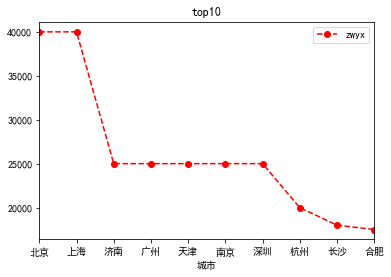

In [241]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
top10.plot(title='top10',style='ro--')
plt.legend()
plt.show()

In [242]:
top10.plot?

## 案例二 

In [243]:
cens=pd.read_csv('census.csv')
cens.head(10)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [244]:
#以每个州人口最多的 3 个县的人口总和为这个州人口的衡量标准，哪 3 个州人口最多？
cens1=cens.loc[cens['SUMLEV']==50]
def sums(x):
    return x.sort_values(by='CENSUS2010POP',ascending=False).head(3)['CENSUS2010POP'].sum()
cens1.groupby('STNAME').apply(sums).sort_values(ascending=False).head(3)

STNAME
California    15924150
Texas          8269632
Illinois       6815061
dtype: int64

In [245]:
# for i in cens1.groupby(['STNAME']):
#     print(i)

In [246]:
cens.sort_values?

In [247]:
# 在 2010 年至 2012 年间人口平均量是怎么样的

In [248]:
cens2=cens1.loc[:,['CTYNAME','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012']]
cens2['mean']=cens2.loc[:,['CTYNAME','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012']].mean(axis=1)

In [249]:
# 在 2010 年至 2012 年间人口平均量是怎么样的
country = cens[cens['SUMLEV'] == 50]

def mean(x):
    lis = x[['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012']]
    return pd.Series([x['STNAME'],x['CTYNAME'],lis.mean()],index = ['STNAME','CTYNAME','MEAN'])

country.apply(mean,axis = 1).head(3)

,STNAME,CTYNAME,MEAN
1,Alabama,Autauga County,55029.333333
2,Alabama,Baldwin County,186749.333333
3,Alabama,Barbour County,27242.000000


In [250]:
# 在 2010 年至 2012 年间人口增幅最大
country = cens[cens['SUMLEV'] == 50]

def mean(x):
    lis = x[['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012']]
    return pd.Series([x['STNAME'],x['CTYNAME'],lis.max()-lis.min()],index = ['STNAME','CTYNAME','chazhi'])

country.apply(mean,axis = 1).head(3)

,STNAME,CTYNAME,chazhi
1,Alabama,Autauga County,593
2,Alabama,Baldwin County,7203
3,Alabama,Barbour County,182


In [251]:
cens2.head(4)

,CTYNAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,mean
1,Autauga County,54660,55253,55175,55029.333333
2,Baldwin County,183193,186659,190396,186749.333333
3,Barbour County,27341,27226,27159,27242.000000
4,Bibb County,22861,22733,22642,22745.333333


In [252]:
def f(x):
    pass
#     print(x)
cens.apply(f,axis=1)
print(1)

1


In [253]:
cens1.groupby('STNAME').apply??

Object `apply` not found.


In [ ]:
cens1.groupby('STNAME').apply